## Exercise 2.3.5: Fashion MNIST data (HW)

You are given the following fashion MNIST data. Do the multinomial regression so that the regression machine can determine the label from the images. Calculate the test accuracy. In the test dataset, identify at least 5 cases where your predictions are wrong, and explain why possibly they were mis-classified.

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

In [ ]:
xx, yy = trainset[0]

Ankle boot


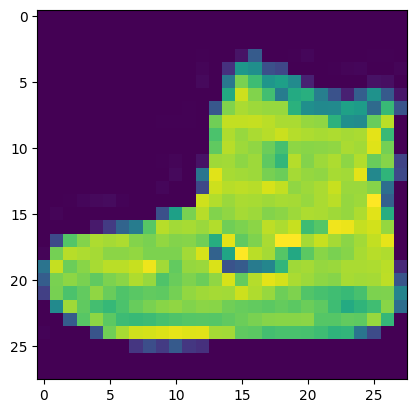

In [ ]:
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])



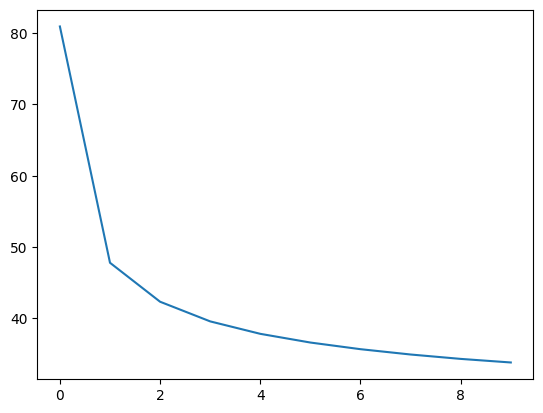

In [ ]:
z_model = nn.Linear(784, 10, bias=True)

loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)

history=[]
epochs = 10

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in trainloader:
    zhat = z_model(xx)
    loss = loss_fn(zhat, tt)
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)
plt.plot(history)

In [ ]:
zhat_test = z_model(x_test)
Q_test = torch.softmax(zhat_test, axis=1)
#y_test
y_hat = torch.argmax(Q_test, axis=1).to(torch.float32)

torch.mean((y_hat ==y_test.reshape([-1])).to(torch.float32))

tensor(0.9164)

In [ ]:
class SoftmaxModel(torch.nn.Module):
    def __init__(self, input_units, output_units):
        super().__init__()
        self.linear = torch.nn.Linear(input_units, output_units, bias=True)

    def forward(self, X):
        Z = self.linear(X)
        exp_Z = torch.exp(Z)
        Q = exp_Z / torch.sum(exp_Z, axis=1, keepdim=True)  # Normalize over classes
        return Q

softmax_ftn = SoftmaxModel(784, num_classes)



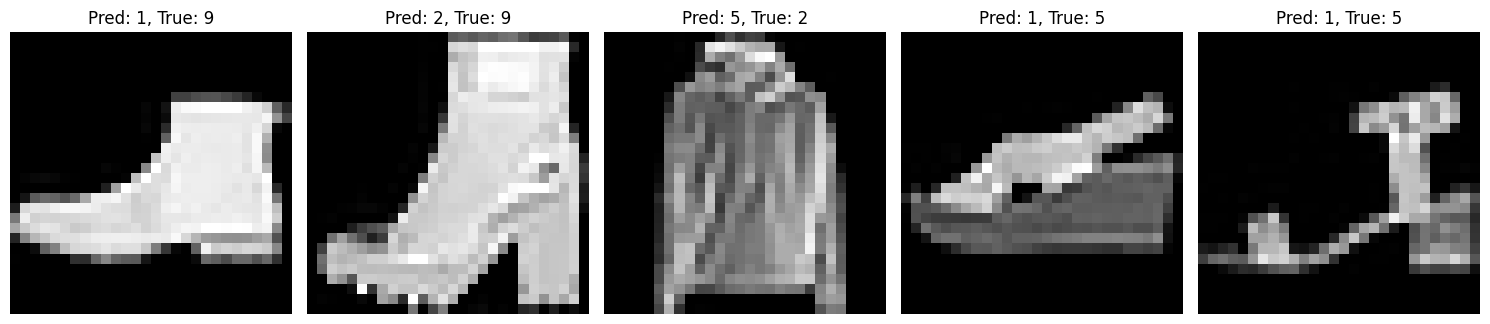

In [ ]:
import matplotlib.pyplot as plt

incorrect_examples = []  # [(image, predicted_label, true_label)]

with torch.no_grad():
    for xx, tt in test_loader:
        xx = xx.view(xx.size(0), 784)  # Reshape to have 784 features
        q = softmax_ftn(xx)  # Predict probabilities
        yhat = torch.argmax(q, axis=1)  # Predicted labels

        for i in range(len(tt)):
            if yhat[i] != tt[i]:  # 잘못된 예측
                incorrect_examples.append((xx[i].view(28, 28), yhat[i].item(), tt[i].item()))

        # 최소 5건의 예시를 저장한 후 루프 종료
        if len(incorrect_examples) >= 5:
            break

# 잘못된 예측 시각화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, (image, pred_label, true_label) in enumerate(incorrect_examples[:5]):
    axes[i].imshow(image.cpu(), cmap="gray")
    axes[i].set_title(f"Pred: {pred_label}, True: {true_label}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()

1) 앵클부츠를 바지로 예상:
2) 앵클부츠을 풀오버로 예상
3) 풀오버를 샌들로 예상
4) 샌들을 바지로 예상
5) 샌들을 바지로 예상

모델을 개선하거나 학습을 더 많이 시키자